In [66]:
import matplotlib.pyplot as plt
from tools._vectools import e_n
from itertools import product


import numpy as np
np.set_printoptions(linewidth=np.inf, precision=2)

In [67]:
def all_bitstrings(N, M,K):
    return [p for p in product(range(M), repeat=N) if sum(p) <= K]

def H0(phi, k):
    return np.array([[0, np.exp(1j*phi) + np.exp(1j*k), 1 + np.exp(1j*k)],
                     [np.exp(-1j*phi) + np.exp(-1j*k), 0, 0],
                     [1 + np.exp(-1j*k), 0, 0]], dtype=complex)

def eps(H0, phi,k):
    return np.linalg.eigvalsh(H0(phi, k))

def cont_bands(H0, phi, Nk,Nq,N):
   
    Ks = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
    qs = np.linspace(-np.pi, np.pi, Nq, endpoint=False)
    pairs =  [(0,0),(0,1),(0,2),(1,1),(1,2),(2,2)]#all_bitstrings(2,N,2)
    K_grid, q_grid = np.meshgrid(Ks, qs, indexing='xy')

    band_dict = {}

    for idx, (lam, mu) in enumerate(pairs):
        E = np.zeros_like(K_grid)
        for i in range(Nq):
            for j in range(Nk):
                k1 = (Ks[j]/2 + qs[i] + np.pi) % (2*np.pi) - np.pi
                k2 = (Ks[j]/2 - qs[i] + np.pi) % (2*np.pi) - np.pi
                e1 = eps(H0,phi,k1)
                e2 = eps(H0,phi,k2)
                E[i, j] = e1[lam] + e2[mu]
        band_dict[(lam,mu)] = E

    return band_dict

In [68]:
bnds = cont_bands(H0, 0, 20,20,3)

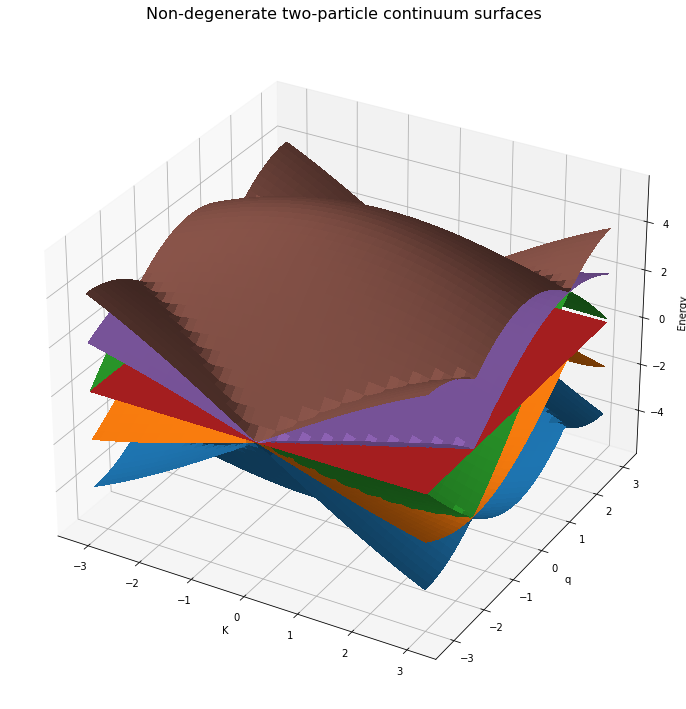

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import eigh

# ---------- parameters ----------
phi   = 0.0          # Peierls phase
Nk    = 81           # K resolution
Nq    = 81           # q resolution
bnds = cont_bands(H0, 0, Nk,Nq,3)
# --------------------------------



Ks = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
qs = np.linspace(-np.pi, np.pi, Nq, endpoint=False)
K_grid, q_grid = np.meshgrid(Ks, qs, indexing='xy')

pairs = [(0,0),(0,1),(0,2),(1,1),(1,2),(2,2)]
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')

for pair in pairs:
    ax.plot_surface(K_grid, q_grid, bnds[pair], linewidth=0, antialiased=False, label= f"λ={lam}, μ={mu}")
    ax.set_xlabel('K')
    ax.set_ylabel('q')
    ax.set_zlabel('Energy')


fig.suptitle("Non-degenerate two-particle continuum surfaces", fontsize=16)
plt.tight_layout()
plt.show()
